<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT23/blob/main/template-report-lab-X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3: Approximation**
**Nolwenn Deschand**

# **Abstract**

In this lab, we will implement the approximation of a function, using the L2 projection on piecewise approximation. 

#**About the code**

In [114]:
"""This program is a lab report using the provided template"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# written by Nolwenn Deschand (deschand@kth.se)
# Template by Johan Hoffman


'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [115]:
# Load neccessary modules.
from google.colab import files

import numpy as np
import scipy.integrate as integrate

from matplotlib import pyplot as plt


# **Introduction**

Approximating functions can be really useful, for examples in cases where it is hard to evaluate functions in some points. A function can be approximated in one or several dimensions, but we will only focus on the 1D approximation here.


---

Most of the formulas used in this lab come from the chapters 9 and 10 of the book *Methods in Computational Science*, from Johan Hoffman.

[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/17068)



# **Method**

**Implementation of the L2 projection to piecewise linear approximation over mesh in 1D**

According to the lecture notes the $L^{2}$ projection is defined by $P_{N}f(x) = \sum_{j=1}^{N}\alpha_{j}\phi_{j}(x)$

with $\alpha = (\alpha_{1},...,\alpha_{n})^{T}$ the vector of coordinates that we are looking for. 

We can get the coordinates $\alpha$ thanks to the following equation:

$\sum_{j=1}^{N}\alpha_{j}(\phi_{j},\phi_{i}) = (f, \phi_{i}), \forall i = 1,...,N$, which corresponds to a matrix equation $A\alpha = b$ (equation (9.19) from the book).


$A = (a_{ij})$ is the mass matrix defined by $a_{ij}= (\phi_{i},\phi_{j})$ and the load vector $b = (b_{i})$ is defined by $b_{i} = (f,\phi_{i})$.

To compute A, we can use the fact that A is a tridiagonal sparse matrix, and we can compute the components with the following equations:

> $a_{kk}= (\phi_{k},\phi_{k}) = \frac{h_{k}}{3} + \frac{h_{k+1}}{3}$


> $a_{kk+1}= (\phi_{k},\phi_{k+1}) = \frac{h_{k+1}}{6}$

> $a_{kk-1}= (\phi_{k},\phi_{k-1}) = \frac{h_{k}}{6}$

From the book equation (9.20), we can get the coefficients b as following:

> $b_{k} = (f,\phi_{k}) = \int_{0}^{1} f(x)\phi_{k}(x) dx = \int_{I_{k}} f(x)\lambda_{k,1}(x) dx + \int_{I_{k+1}} f(x)\lambda_{k+1,0}(x) dx $

with the local linear Lagrange shape functions $\lambda_{k,1}(x) = \frac{x - x_{k-1}}{h_{k}}$ and $\lambda_{k+1,0}(x) = \frac{x_{k+1} - x}{h_{k+1}}$
and the approximation made using a mesh composed of subintervals $I_{k} =[x_{k-1},x_{k}]$ of length $h_{k} = x_{k}−x_{k-1}$.

To compute the coefficients of b, we will use the function quad from scipy for integration. 

The implemented function will take as input the function f(x) that we want to approximate, and a 1D mesh with nodes $(x_{0},...,x_{n})$.

As output, the implemented function should produce the vector of $L^{2}$ projection of f(x) evaluated in $(x_{0},...,x_{n})$, that is the vector $\alpha$ in the equation $A\alpha = b$.


In [116]:
def L2projection1d (f, mesh):
  n = mesh.shape[0]
  A = np.zeros((n,n))
  b = np.zeros(n)

  # compute A and b coefficients

  # first row
  A[0,0] = (mesh[1]-mesh[0])/3 #because h0 = 0
  A[0,1] = (mesh[1]-mesh[0])/6

  b[0] = integrate.quad(lambda x: f(x) * ((mesh[1]-x)/(mesh[1]-mesh[0])), mesh[0], mesh[1])[0]

  for i in range(1,n-1):
    hk = mesh[i] - mesh[i-1]
    hkplus1 = mesh[i+1] - mesh[i]
    A[i,i-1] = hk/6
    A[i,i] = hk/3 + hkplus1/3
    A[i,i+1] = hkplus1/6
    b[i] = integrate.quad(lambda x: f(x) * ((x - mesh[i-1])/hk), mesh[i-1], mesh[i])[0] + integrate.quad(lambda x: f(x) * ((mesh[i+1]-x)/hkplus1), mesh[i], mesh[i+1])[0]
  
  # last row
  A[n-1,n-2] = (mesh[n-1] - mesh[n-2])/6
  A[n-1,n-1] = (mesh[n-1] - mesh[n-2])/3 #because hn = 0
  b[n-1] = integrate.quad(lambda x: f(x) * (x - mesh[n-2])/(mesh[n-1] - mesh[n-2]), mesh[n-2], mesh[n-1])[0]

  alpha = np.linalg.solve(A,b)
  return alpha



# **Results**

**Implementation of the L2 projection to piecewise linear approximation over mesh in 1D**

In order to test the L2 projection to piecewise linear approximation over mesh in 1D, we will first visualize on a graph the exact function and the approximated function. To create the nodes and distribute them evenly, we use the function linspace from numpy. 

To plot the exact function we also need the x points in which we want to evaluate the function, that's why we use linspace for a large numper of points.

We can also plot the error against the exact function by computing the difference between the exact function and the value in alpha. We can plot that for different values of n, the number of nodes in the mesh. As the function will be approximated for more points as the number of nodes inscreases, we would expect the error to be lower when the number of nodes increases.

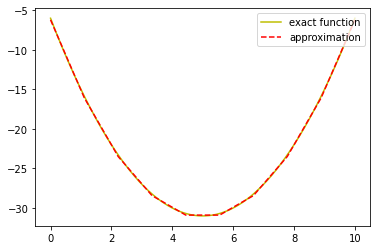

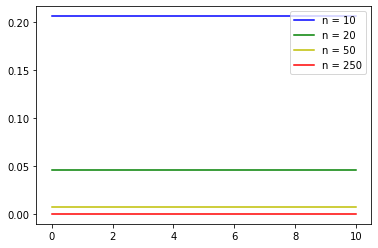

In [121]:
def f(x):
  return x**2 - 10*x - 6

mesh = np.linspace(0, 10, 10)
x = np.linspace(0, 10, 1000)

alpha = L2projection1d(f, mesh)

plt.figure()
plt.plot(x, f(x),"y",label= "exact function")
plt.plot(mesh, alpha, "r--",label= "approximation")
plt.legend(loc="upper right")

# BLUE : np points = 10
plt.figure()
plt.plot(mesh, f(mesh)-alpha, 'b',label= "n = 10")

# GREEN : np points = 10
mesh = np.linspace(0, 10, 20)
alpha = L2projection1d(f, mesh)
plt.plot(mesh, f(mesh)-alpha, 'g',label= "n = 20")

# YELLOW : np points = 50
mesh = np.linspace(0, 10, 50)
alpha = L2projection1d(f, mesh)
plt.plot(mesh, f(mesh)-alpha, 'y',label= "n = 50")

# RED : np points = 250
mesh = np.linspace(0, 10, 250)
alpha = L2projection1d(f, mesh)
plt.plot(mesh, f(mesh)-alpha, 'r', label= "n = 250")

plt.legend(loc="upper right")

plt.show()

On the first graph, we can see that the approximation follows the exact function pretty well, even if we notice some small errors. These errors could be reduced by increasing the number of nodes in the mesh, as we can see on the second graph: the error decreases quickly and is almost null for n = 250 nodes.

# **Discussion**

The implemented function behaves as expected on the tested cases and none of the obtained results is surprising.
